In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


In [7]:
X.shape

(150, 4)

In [9]:
y.shape

(150,)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [12]:
# Cross Val!

from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)


array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [17]:
# There is also 'Leave One Out' cross val
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
print(scores[range(5)])
print(scores.mean())


[1. 1. 1. 1. 1.]
0.96


In [29]:
# grid search
import numpy as np
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1,6),
    'weights': ['uniform', 'distance']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=7)
grid.fit(X, y);

In [30]:
# get the best parameters
grid.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

In [31]:
# how is our best model?
model = grid.best_estimator_
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X)))
print(scores[range(5)])
print(scores.mean())


[1. 1. 1. 1. 1.]
0.96


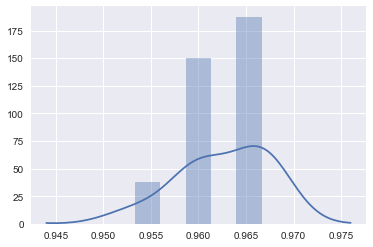

In [65]:
# I want to distribution of the accuracy of all the models in the grid
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.DataFrame(grid.cv_results_).head()
sns.distplot(grid.cv_results_['mean_test_score'], bins=5)
